In [1]:
%run main_flow.py

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Searching in /Users/AndyKwan/Documents/data science/word_embedding/wiki-news-300d-1M.vec for word vector file ...
Loading pretrained embedding, it may take some time ...
====== Examples of things you can do with the embeddings =======


/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.751591145992279), ('monarch', 0.6741327047348022), ('princess', 0.6713887453079224), ('kings', 0.669899046421051), ('kingdom', 0.5971317887306213), ('royal', 0.5921063423156738), ('uncrowned', 0.5911506414413452), ('prince', 0.5909028649330139), ('lady', 0.5904011726379395), ('monarchs', 0.5884358286857605)]
[('didnt', 0.7912282943725586), ('doesnt', 0.7744663953781128), ('wont', 0.7738192081451416), ('wouldnt', 0.7669345736503601), ('cant', 0.7571746706962585), ('Dont', 0.7333537340164185), ('donot', 0.7325714826583862), ('shouldnt', 0.723484456539154), ('dosnt', 0.6950490474700928), ('dnt', 0.6921104192733765)]
[('another', 0.7364089488983154), ('the', 0.7042925357818604), ('one', 0.6761847734451294), ('only', 0.6591331958770752), ('very', 0.6515913009643555), ('just', 0.6320288777351379), ('second', 0.628737211227417), ('some', 0.626456618309021), ('first', 0.6264200210571289), ('having', 0.6240551471710205)]
Checking Embedding coverage ...
Embedding converage (in terms

In [3]:
T.vectorizer.row2doc
T.vectorizer.word2weight

defaultdict(<function transformer.TfidfEmbeddingVectorizer.fit.<locals>.<lambda>>,
            {'Aromas': 4.427805703650666,
             'include': 6.267181529585466,
             'tropical': 4.646644058169356,
             'fruit': 2.1720579847756962,
             'broom': 7.538209846058128,
             'brimstone': 8.559263900380362,
             'and': 1.0215476429407109,
             'dried': 3.9201971378533442,
             'herb': 4.0523485238737535,
             'The': 2.031087799351977,
             'palate': 2.251274210672141,
             'isnt': 6.342334251964811,
             'overly': 6.525631894731821,
             'expressive': 6.414817528391531,
             'offering': 4.975330454146297,
             'unripened': 11.377662158651438,
             'apple': 3.424080226446112,
             'citrus': 3.5051117387355313,
             'sage': 5.326750152900036,
             'alongside': 4.18341301285433,
             'brisk': 5.237777606425183,
             'acidity': 2.347

In [4]:
T.vectorizer.word2weight
mean_tfidf_values = []
for sentence in Tokens:
    idf = [T.vectorizer.word2weight[word] for word in sentence]
    mean_tfidf_values.append(sum(idf) / len(idf))
        

In [23]:
tfidf_df = pd.DataFrame({'mean_idf': mean_tfidf_values, 'ratings': pts})

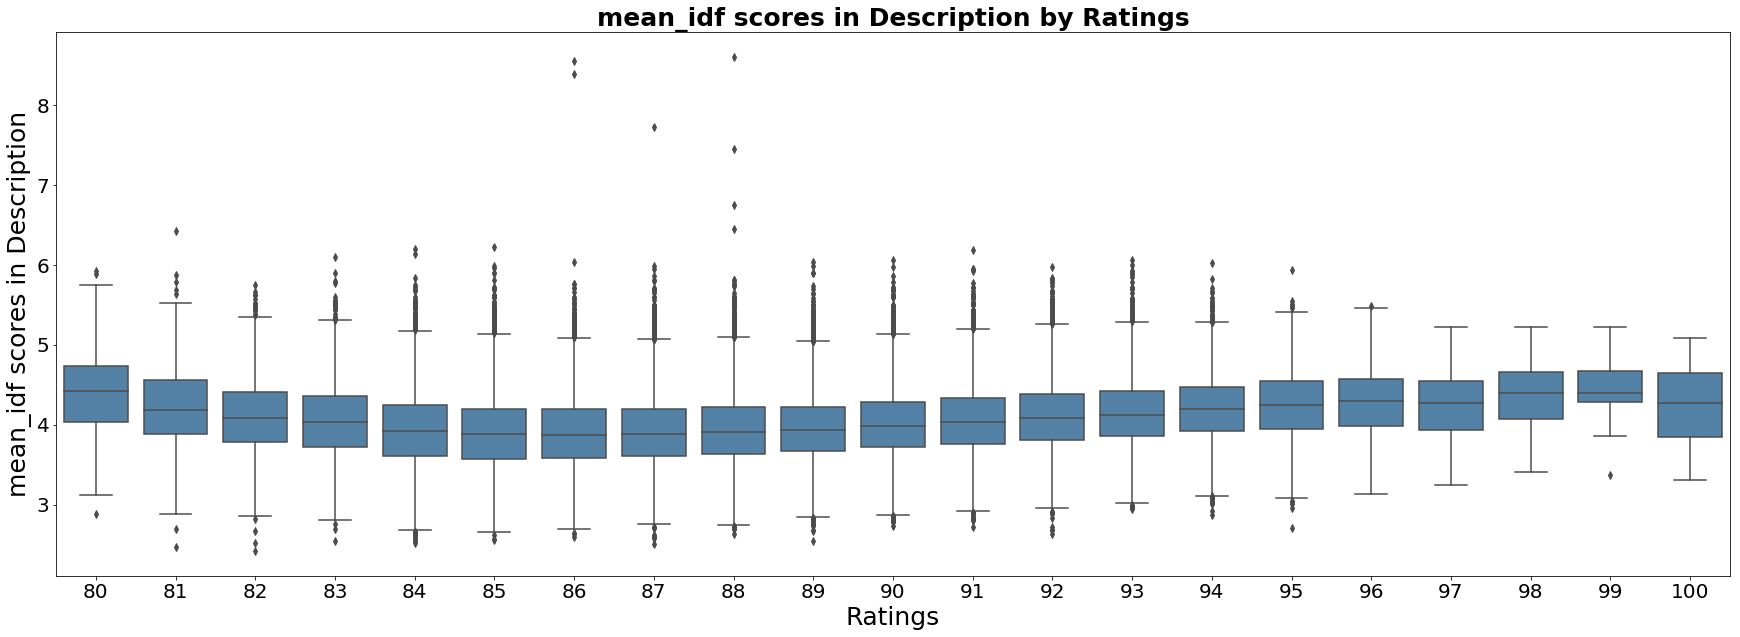

In [28]:
# Relation between word count and ratings
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(x='ratings', y='mean_idf', data=tfidf_df, color='steelblue')
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('mean_tfidf scores in Description by Ratings', fontweight="bold", size=25) # Title
ax.set_ylabel('mean_tfidf scores in Description', fontsize=25) # Y label
ax.set_xlabel('Ratings', fontsize=25) # X label
plt.show()